In [ ]:
!pip install tweepy==4.9.0
#API Key - 9y9uyYtzCQZhrmishaFmlKwOG
#API Secret Key - DUVnngbDHcKA4ytOWH3XXqs7JDDrGlzbnNftts2la2rR3EL5tA
#Bearer Token - AAAAAAAAAAAAAAAAAAAAAOD5iAEAAAAAb8tcsqHQotKI4IvSf2a3%2B1nGw9s%3DJAOo37Yrq4yU7ud8yfo507QsnS8sNfMbw32H7gcXwu1nbTvn2q
#Client ID - b0ZDaWJkSFZISmlfQnlxVUlMZzU6MTpjaQ
#Client Secret - afzHw0FjTx0MhsEPjF_EK61pSsxVYzyHE7PJDmge_G3l4CWdpB
#BhrXVzfdtZWadU5f0mY5B9dIXwm_vZPe3caA-B19c9wNF2atNx

#Access token - 3147434104-tLthMbDh8QZ1cN7yaeGWySpVSHeUTSGBKo2scCI
#AT Secret - pxxp0ospu68358qn3JUwvChH6DKQI1pKSthX3rxLKnnny

#!pip install --upgrade google-cloud-language

In [ ]:
#!set GOOGLE_APPLICATION_CREDENTIALS = C:\Users\Acer\Music\EC 601rare-habitat-365718-0606384fe7fe.json
#!pip install textblob
#!pip install nltk

In [ ]:
#!pip install PIL
#!pip install wordcloud
#!pip install matplotlib

In [1]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
#nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
twitter_client = tweepy.Client(bearer_token = 'AAAAAAAAAAAAAAAAAAAAAOD5iAEAAAAAb8tcsqHQotKI4IvSf2a3%2B1nGw9s%3DJAOo37Yrq4yU7ud8yfo507QsnS8sNfMbw32H7gcXwu1nbTvn2q')
#google_client = language_v1.LanguageServiceClient()

In [3]:
query = '#apple -is:retweet lang:en'


tweet_list = []
#tweet_list_df = []



In [4]:
def get_tweets(query,tweet_list):
    paginator = tweepy.Paginator(
    twitter_client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=10                               # How many pages to retrieve
    )

    for tweet in paginator.flatten(): # Total number of tweets to retrieve
        tweet_list.append(tweet)
    #print(tweet)
    tweet_list_df = pd.DataFrame(tweet_list)
    tweet_list_df = pd.DataFrame(tweet_list_df['text'])
    return tweet_list,tweet_list_df

a,b = get_tweets(query,tweet_list)

### Creating DataFrame

In [ ]:
#def create_df()    
    
b.head(5)

In [5]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove punctuations and numbers
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [6]:

def clean_tweet(tweet_list_df):
    cleaned_tweets = []
    for tweet in tweet_list_df['text']:
        cleaned_tweet = preprocess_tweet(tweet)
        cleaned_tweets.append(cleaned_tweet)
        tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
    return tweet_list_df
    

def sentiment(tweet_list_df):
    tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
    for index, row in tweet_list_df['cleaned'].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        if comp <= -0.05:
            tweet_list_df.loc[index, 'sentiment'] = "negative"
        elif comp >= 0.05:
            tweet_list_df.loc[index, 'sentiment'] = "positive"
        else:
            tweet_list_df.loc[index, 'sentiment'] = "neutral"
        tweet_list_df.loc[index, 'neg'] = neg
        tweet_list_df.loc[index, 'neu'] = neu
        tweet_list_df.loc[index, 'pos'] = pos
        tweet_list_df.loc[index, 'compound'] = comp

        
    return tweet_list_df

#b = clean_tweet(b)
    


In [11]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [7]:
query_don = '#donaldtrump -is:retweet lang:en'
query_joe = '#joebiden -is:retweet lang:en'
don_list = []
joe_list = []
don_list,don_df = get_tweets(query_don,don_list)
don_df = clean_tweet(don_df)
don_df = sentiment(don_df)


joe_list,joe_df = get_tweets(query_joe,joe_list)
joe_df = clean_tweet(joe_df)
joe_df = sentiment(joe_df)




In [8]:
joe_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Joe being Joe #JoeBiden https://t.co/cGoDGAIXmO,joe being joe joebiden,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
1,@newsmax #JoeBiden WORST PRESIDENT EVER.,joebiden worst president ever,-1.0,1.00,negative,0.577,0.423,0.000,-0.6249
2,Problem SOLVED 👌 in 28 seconds [2022 Edition]\...,problem solved in 28 seconds 2022 edition it d...,0.5,0.55,positive,0.079,0.735,0.185,0.5574
3,@tedcruz #JoeBiden LOOK AT WHAT YOU DID.,joebiden look at what you did,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
4,Jill Biden should have passed out free Boga Da...,jill biden should have passed out free boga da...,0.4,0.80,positive,0.000,0.898,0.102,0.5106


In [9]:
don_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Random Trump https://t.co/EAVkU7r66e - #random...,random trump randomtrump trump donaldtrump gip...,-0.500,0.500,neutral,0.000,1.000,0.000,0.0000
1,@ABC I foresee another money-grab excuse again...,foresee another money grab excuse against the...,-0.175,0.425,neutral,0.213,0.516,0.271,-0.0258
2,Former employee claims Trump media company com...,former employee claims trump media company com...,0.000,0.000,negative,0.209,0.654,0.137,-0.2732
3,"Trump attacks U.S. Jews, posting they must 'ge...",trump attacks s jews posting they must get the...,0.000,0.000,negative,0.172,0.828,0.000,-0.4404
4,Random Trump https://t.co/kaVERNld0D - #random...,random trump randomtrump trump donaldtrump gip...,-0.500,0.500,neutral,0.000,1.000,0.000,0.0000


In [27]:
count_don = count_values_in_column(don_df,"sentiment")

count_joe = count_values_in_column(joe_df,"sentiment")

print("Tweeets on Donald Trump:",count_don,'\n',"Tweets on Joe Biden:",count_joe,sep='\n')

Tweeets on Donald Trump:
          Total  Percentage
positive    393        39.3
neutral     367        36.7
negative    240        24.0


Tweets on Joe Biden:
          Total  Percentage
negative    471       47.15
positive    330       33.03
neutral     198       19.82


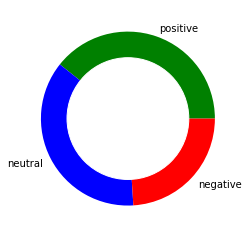

In [13]:
# create data for Pie Chart
#pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= count_don.index
size=count_don["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

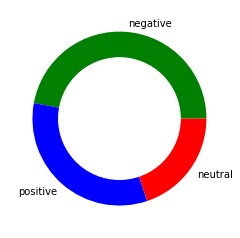

In [14]:
# create data for Pie Chart
#pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= count_joe.index
size=count_joe["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:
#a = np.where(count_don['price_1'] == count_joe['price_2'], 'True', 'False')

if(count_don.iloc[0]['Percentage'] >= count_joe.iloc[0]['Percentage']):
    print("Donald Trump has better acceptance rate than Joe Biden")
else:
    print("Joe Biden has better acceptance rate than Donald Trump")

Joe Biden has better acceptance rate than Donald Trump
